In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [5]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [9]:

df.describe()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


In [11]:
df.columns 

Index(['Oil Investments', 'Gold Investments', 'Comp Stock',
       'Other sharesInvestments'],
      dtype='object')

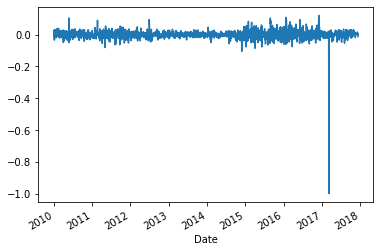

In [12]:
df['Oil Investments'].plot()

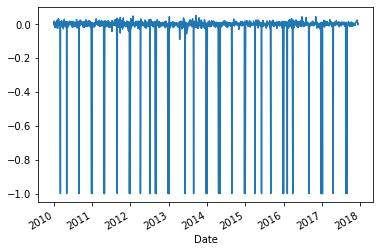

In [13]:
df['Gold Investments'].plot()

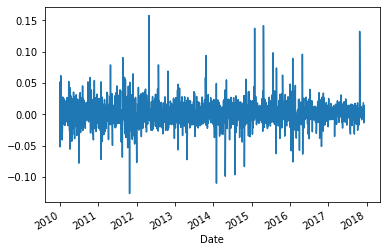

In [14]:
df['Other sharesInvestments'].plot()

In [15]:
#Now we will check if data is stationary or not.
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Comp Stock']) # adfuller give us 5 values

In [17]:
 # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.473386265908326, 3.207774293088594e-23, 12, 1971, {'1%': -3.4336720887549483, '5%': -2.863007508094813, '10%': -2.567551240570721}, -10649.854659769328)


In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(df):
    result=adfuller(df) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [19]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic : -12.473386265908326
p-value : 3.207774293088594e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [20]:
adfuller_test(df['Other sharesInvestments'])

ADF Test Statistic : -44.84814456404393
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [21]:
adfuller_test(df['Gold Investments'])

ADF Test Statistic : -15.906853851669037
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [22]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -45.94216292983993
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


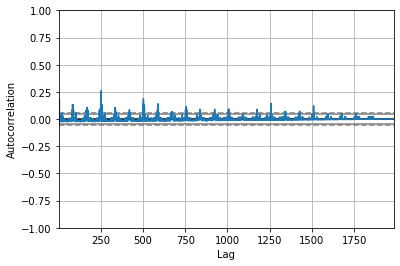

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Gold Investments'])
plt.show()

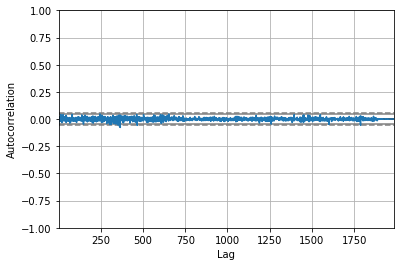

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments'])
plt.show()

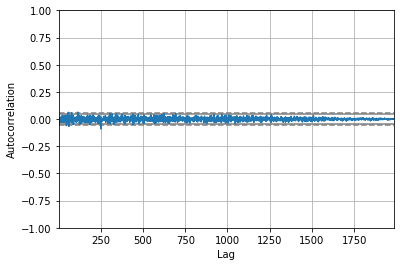

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Other sharesInvestments'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

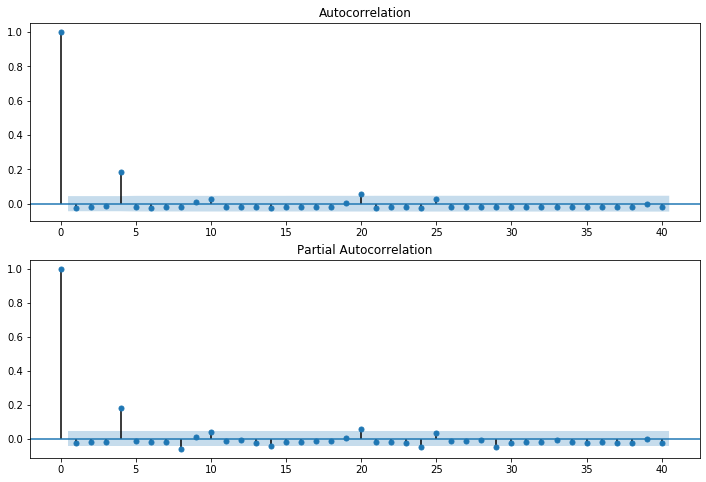

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Gold Investments'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Gold Investments'],lags=40,ax=ax2)

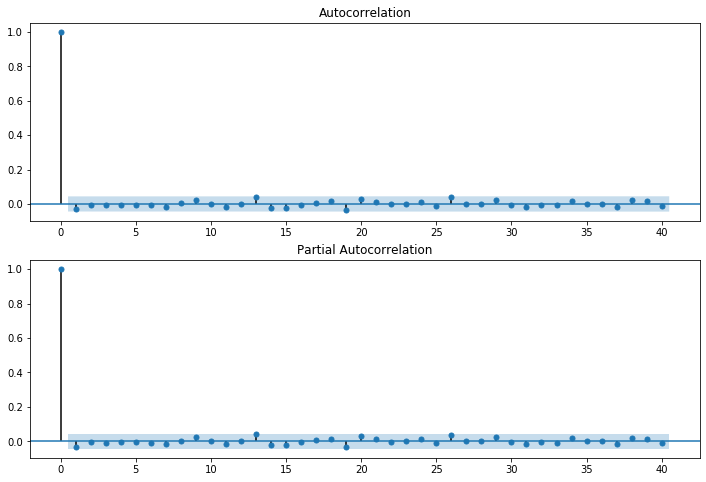

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Oil Investments'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Oil Investments'],lags=40,ax=ax2)

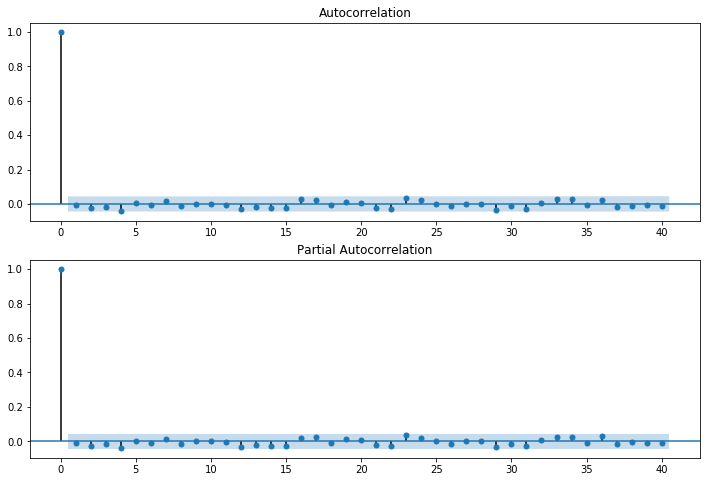

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Other sharesInvestments'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Other sharesInvestments'],lags=40,ax=ax2)

In [31]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(df['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [35]:
model_fit.summary()

C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Ruchi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Ruchi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Ruchi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Other sharesInvestments   No. Observations:                 1983
Model:                        ARIMA(1, 1, 1)   Log Likelihood                4964.088
Method:                              css-mle   S.D. of innovations              0.020
Date:                       Wed, 21 Oct 2020   AIC                          -9920.176
Time:                               12:47:16   BIC                          -9897.806
Sample:                                    1   HQIC                         -9911.958
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            5.234e-07   2.35e-06      0.223      0.824   -4.08e-06    5.13e-06
ar.L1.D.Other sharesInvestments    -0.0124      0.022     -0.557      0.577      -0.056       0.031
ma.L1.D.Other sharesInvestments    -0.9951        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -80.4330           +0.0000j           80.4330            0.5000
MA.1            1.0050           +0.0000j            1.0050            0.0000
-----------------------------------------------------------------------------
"""

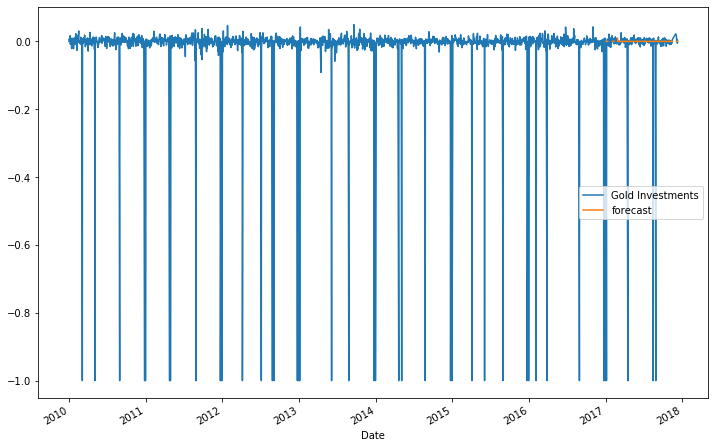

In [37]:
df['forecast']=model_fit.predict(start=1800,end=1982,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [38]:
import statsmodels.api as sm 

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

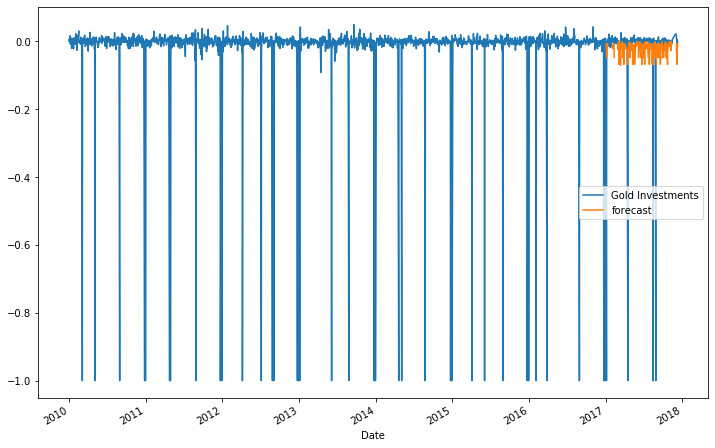

In [40]:
df['forecast']=results.predict(start=1800,end=1982,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [64]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-3]+ DateOffset(months=x)for x in range(0,50)]

In [65]:
future_datest_df=pd.DataFrame(index=future_dates[2:],columns=df.columns)

In [66]:
future_datest_df.tail()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments,forecast
2021-08-13,NaN,NaN,NaN,NaN,NaN
2021-09-13,NaN,NaN,NaN,NaN,NaN
2021-10-13,NaN,NaN,NaN,NaN,NaN
2021-11-13,NaN,NaN,NaN,NaN,NaN
2021-12-13,NaN,NaN,NaN,NaN,NaN


In [67]:
future_df=pd.concat([df,future_datest_df])

C:\Users\Ruchi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


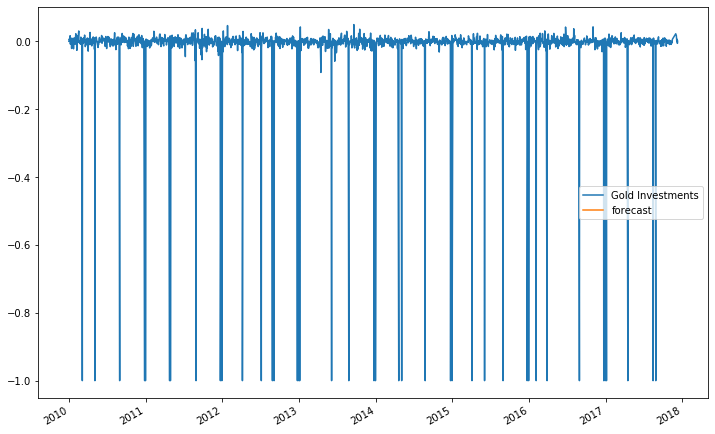

In [68]:
future_df['forecast'] = results.predict(start = 1984, end = 2166, dynamic= True)  
future_df[['Gold Investments', 'forecast']].plot(figsize=(12, 8)) 